# Traveling Salesman

### Problem definition

Given a list of cities and the distance between each pair of cities, the problem asks for the
shortest route starting at the first city, visiting each other city exactly once, then returning
to the first city. This problem is a generalization of the Hamiltonian path problem, one of Karp's
21 NP-complete problems.

### Random problem generator

The class `miplearn.problems.tsp.TravelingSalesmanGenerator` can be used to generate random instances of this
problem. Initially, the generator creates $n$ cities $(x_1,y_1),\ldots,(x_n,y_n) \in \mathbb{R}^2$,
where $n, x_i$ and $y_i$ are sampled independently from the provided probability distributions `n`,
`x` and `y`. For each pair of cities $(i,j)$, the distance $d_{i,j}$ between them is set to:
$$
    d_{i,j} = \gamma_{i,j} \sqrt{(x_i-x_j)^2 + (y_i - y_j)^2}
$$
where $\gamma_{i,j}$ is sampled from the distribution `gamma`.

If `fix_cities=True` is provided, the list of cities is kept the same for all generated instances.
The $\gamma$ values, and therefore also the distances, are still different.

By default, all distances $d_{i,j}$ are rounded to the nearest integer.  If `round=False`
is provided, this rounding will be disabled.

### Challenge A

* Fixed list of 100 cities in the $[0, 1000]^2$ square
* $\gamma_{i,j} \sim U(0.95, 1.05)$
* 512 training instances, 64 test instances

CPU times: user 5min 13s, sys: 4min 46s, total: 10min
Wall time: 32min 2s


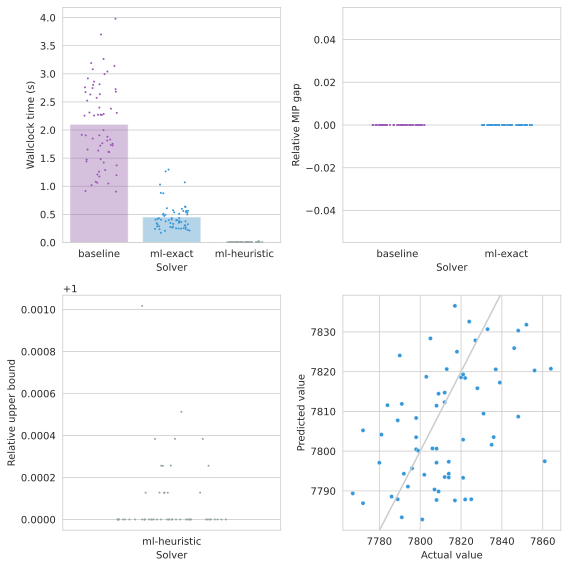

In [1]:
%%time
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

from miplearn.benchmark import run_benchmarks
from miplearn.problems.tsp import TravelingSalesmanGenerator
from scipy.stats import uniform, randint

instances = TravelingSalesmanGenerator(
    x=uniform(loc=0.0, scale=1000.0),
    y=uniform(loc=0.0, scale=1000.0),
    n=randint(low=100, high=101),
    gamma=uniform(loc=0.95, scale=0.1),
    fix_cities=True,
    round=True,
).generate(576)

run_benchmarks(
    train_instances = instances[:512],
    test_instances = instances[512:],
    n_jobs=16,
);